# Assignment 3(due on 11/22)

## Student:蓝仲依（12332283），Gtihub：LanZhongyi

## 批改人：吴昊天

## 得分：56/60

# 1. Niño 3.4 index

In [1]:
import xarray as xr
import netCDF4
SST = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
SST

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [2]:
Nino_SST = SST.sel(lat=slice(-5,5), lon=slice(190,240))
Nino_SST

<xarray.Dataset>
Dimensions:  (lat: 5, lon: 26, time: 684)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

(array([ 26.,  57.,  81., 123., 193., 264., 310., 289., 175.,  42.]),
 array([24.04668236, 24.55778313, 25.06888199, 25.57998276, 26.09108353,
        26.6021843 , 27.11328316, 27.62438393, 28.1354847 , 28.64658356,
        29.15768433]),
 <BarContainer object of 10 artists>)

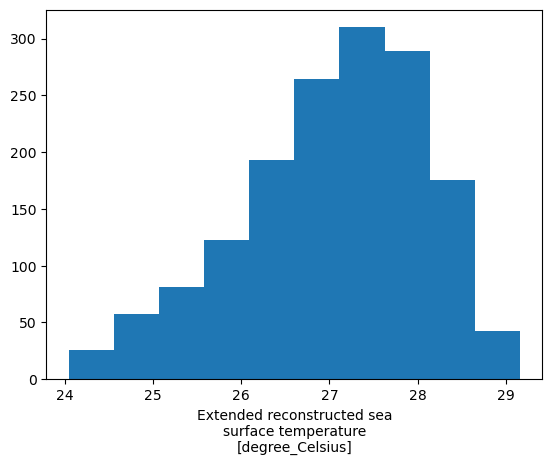

In [3]:
climatology = Nino_SST.sst.groupby('time.month').mean()
climatology.plot()

(array([  324.,  2565., 11361., 27803., 26896., 13691.,  4436.,  1332.,
          433.,    79.]),
 array([-3.05155945, -2.31709933, -1.58263934, -0.84817922, -0.11371918,
         0.62074089,  1.35520101,  2.08966112,  2.824121  ,  3.55858111,
         4.29304123]),
 <BarContainer object of 10 artists>)

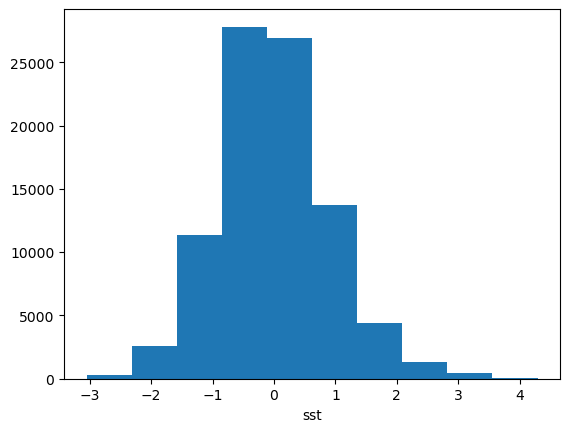

In [4]:
anomalies = Nino_SST.sst.groupby('time.month') - climatology
anomalies.plot()

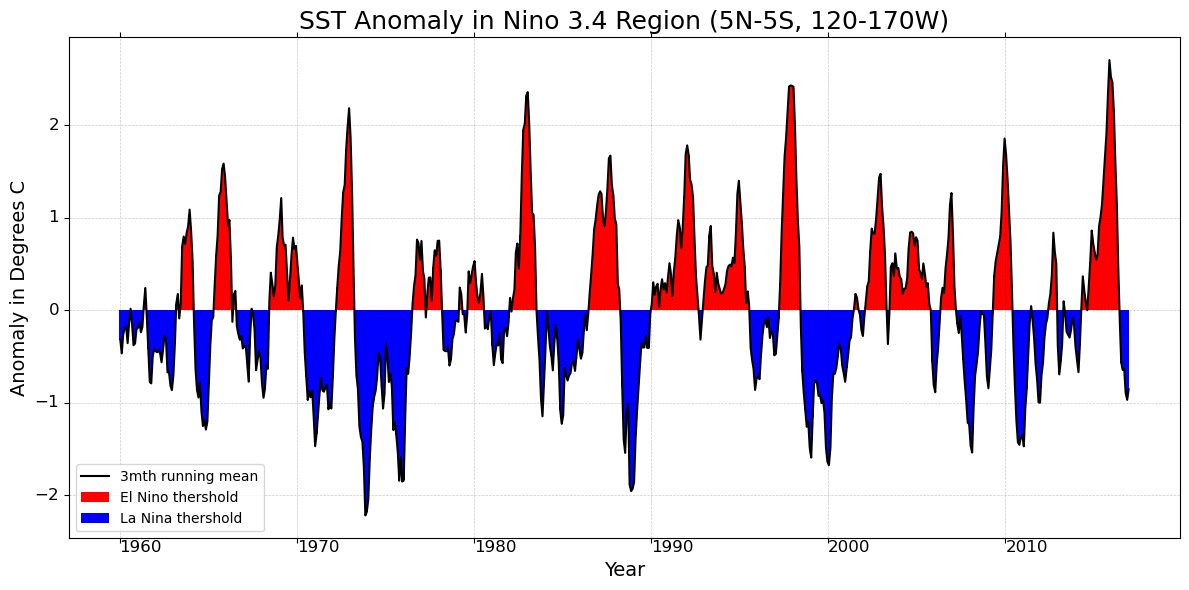

In [5]:
Nino_anomaly = anomalies.mean(dim=['lat','lon'])

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

plt.figure(figsize=(12,6), dpi=100)
plt.plot(Nino_anomaly.time, Nino_anomaly, 'k-', label='3mth running mean')
plt.bar(Nino_anomaly.time, Nino_anomaly.where(Nino_anomaly>0), color='r', width=35.0, label='El Nino thershold')
plt.bar(Nino_anomaly.time, Nino_anomaly.where(Nino_anomaly<0), color='b', width=35.0, label='La Nina thershold')

plt.xticks(fontsize=12, rotation=0, ha='left', va='center')
plt.yticks(fontsize=12, rotation=0, ha='right', va='center')
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=False, 
                direction='out', which='major', grid_color='black')

plt.grid(linestyle='--', linewidth=0.5, alpha=0.2)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Anomaly in Degrees C', fontsize=14)
plt.title('SST Anomaly in Nino 3.4 Region (5N-5S, 120-170W)', fontsize=18)
plt.legend(loc='best')
plt.tight_layout()

mpl.rcParams.update({'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
plt.show()

### 1.1 从海温时间序列中减去气候学得到异常，绘制了温度统计图。
### 1.2 绘制了相近的图像。
### 得分：20/20

### =============================

# 2. Earth’s energy budget

In [2]:
import xarray as xr
import netCDF4
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

TOA = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")
TOA

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

## 2.1

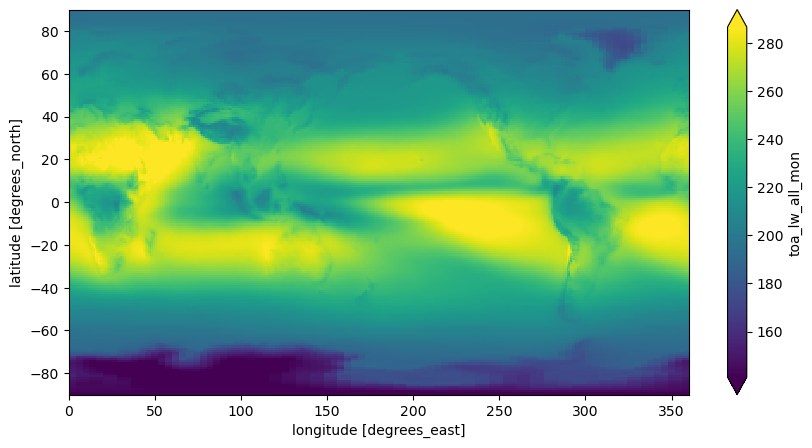

In [3]:
lw = TOA.toa_lw_all_mon.mean(dim='time')
lw.plot(robust=True, figsize=(10, 5))

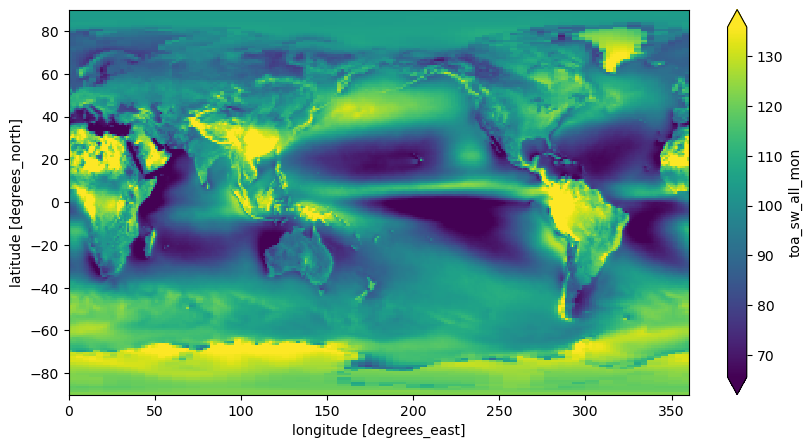

In [4]:
sw = TOA.toa_sw_all_mon.mean(dim='time')
sw.plot(robust=True, figsize=(10, 5))

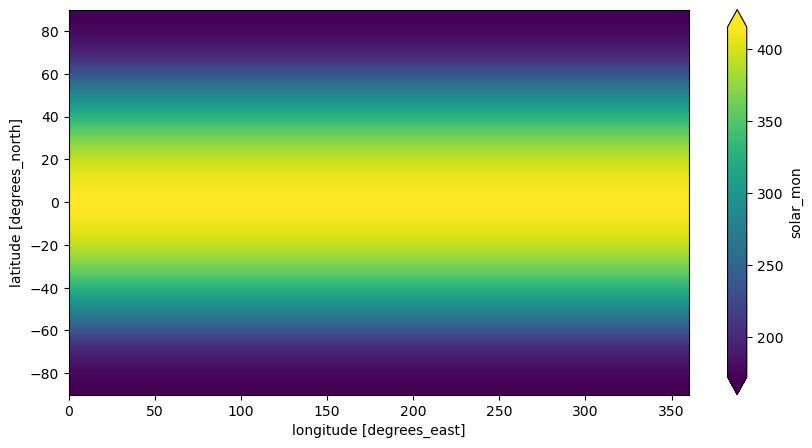

In [5]:
sr = TOA.solar_mon.mean(dim='time')
sr.plot(robust=True, figsize=(10, 5))

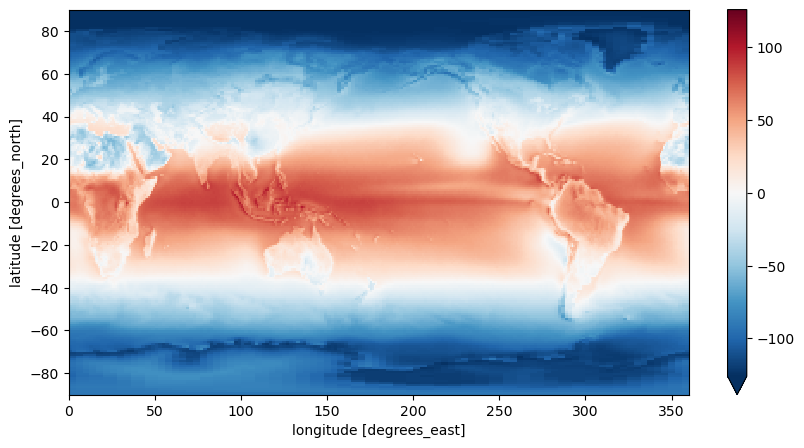

In [6]:
net1 = sr - lw - sw
net1.plot(robust=True, figsize=(10, 5))

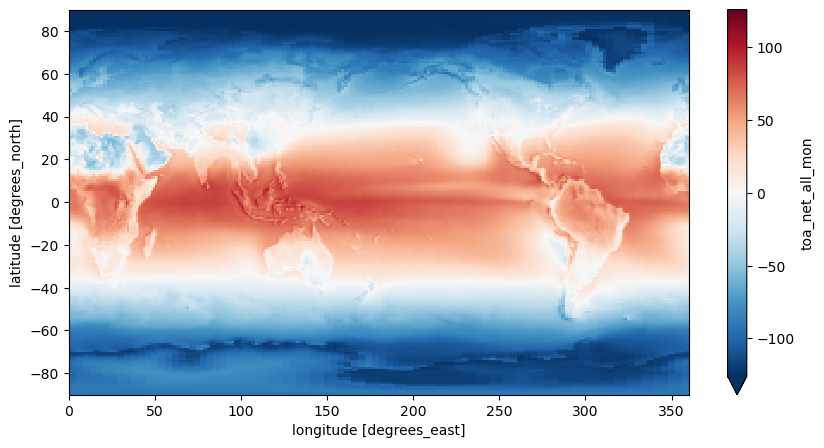

In [7]:
net = TOA.toa_net_all_mon.mean(dim='time')
net.plot(robust=True, figsize=(10, 5))

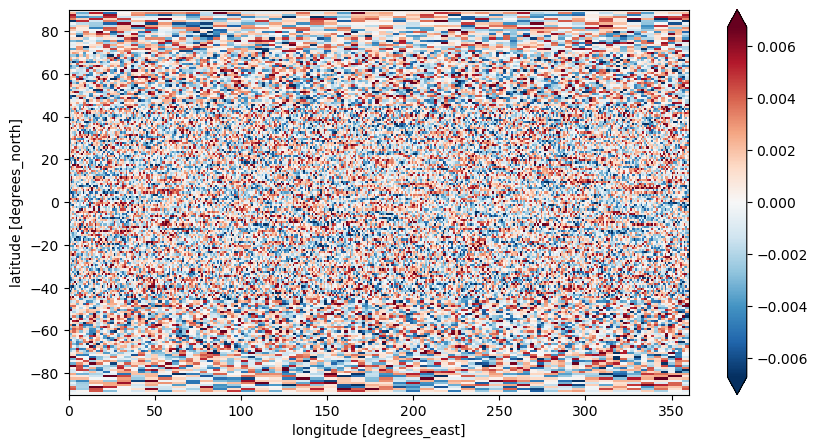

In [8]:
delta = net1 - net
delta.plot(robust=True, figsize=(10, 5))

## 2.2

In [9]:
area = 111*111*np.cos(TOA.lat)
area


<xarray.DataArray 'lat' (lat: 180)>
array([   435.95688,  10596.82   ,  11015.016  ,   1306.0569 ,
        -9603.685  , -11683.844  ,  -3021.9297 ,   8418.332  ,
        12118.818  ,   4677.319  ,  -7064.4863 , -12311.234  ,
        -6239.0913 ,   5569.244  ,  12257.242  ,   7675.988  ,
        -3962.5337 , -11957.92   ,  -8959.25   ,   2276.5134 ,
        11419.261  ,  10063.192  ,   -544.92847, -10652.045  ,
       -10965.721  ,  -1197.5631 ,   9671.628  ,  11648.77   ,
         2916.0854 ,  -8497.634  , -12098.667  ,  -4576.242  ,
         7153.559  ,  12306.411  ,   6144.806  ,  -5666.306  ,
       -12267.842  ,  -7590.381  ,   4065.6418 ,  11983.731  ,
         8884.034  ,  -2383.6035 , -11459.768  ,  -9999.874  ,
          653.8574 ,  10706.436  ,  10915.565  ,   1088.9756 ,
        -9738.814  , -11612.782  ,  -2810.0127 ,   8576.27   ,
        12077.569  ,   4474.8076 ,  -7242.072  , -12300.624  ,
        -6050.0386 ,   5762.924  ,  12277.48   ,   7504.1787 ,
        -4168.431  , -12008.6045 ,  -8808.122  ,   2490.5068 ,
        11499.375  ,   9935.771  ,   -762.7351 , -10759.986  ,
       -10864.556  ,   -980.3027 ,   9805.235  ,  11575.886  ,
         2703.7197 ,  -8654.234  , -12055.525  ,  -4373.022  ,
         7330.017  ,  12293.872  ,   5954.798  ,  -5859.091  ,
...
        -4373.022  , -12055.525  ,  -8654.234  ,   2703.7197 ,
        11575.886  ,   9805.235  ,   -980.3027 , -10864.556  ,
       -10759.986  ,   -762.7351 ,   9935.771  ,  11499.375  ,
         2490.5068 ,  -8808.122  , -12008.6045 ,  -4168.431  ,
         7504.1787 ,  12277.48   ,   5762.924  ,  -6050.0386 ,
       -12300.624  ,  -7242.072  ,   4474.8076 ,  12077.569  ,
         8576.27   ,  -2810.0127 , -11612.782  ,  -9738.814  ,
         1088.9756 ,  10915.565  ,  10706.436  ,    653.8574 ,
        -9999.874  , -11459.768  ,  -2383.6035 ,   8884.034  ,
        11983.731  ,   4065.6418 ,  -7590.381  , -12267.842  ,
        -5666.306  ,   6144.806  ,  12306.411  ,   7153.559  ,
        -4576.242  , -12098.667  ,  -8497.634  ,   2916.0854 ,
        11648.77   ,   9671.628  ,  -1197.5631 , -10965.721  ,
       -10652.045  ,   -544.92847,  10063.192  ,  11419.261  ,
         2276.5134 ,  -8959.25   , -11957.92   ,  -3962.5337 ,
         7675.988  ,  12257.242  ,   5569.244  ,  -6239.0913 ,
       -12311.234  ,  -7064.4863 ,   4677.319  ,  12118.818  ,
         8418.332  ,  -3021.9297 , -11683.844  ,  -9603.685  ,
         1306.0569 ,  11015.016  ,  10596.82   ,    435.95688],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [10]:
sr_gridmean = (TOA.solar_mon * area).mean(dim=['time'])
sr_gridmean

<xarray.DataArray (lat: 180, lon: 360)>
array([[  75016.03 ,   75016.03 ,   75016.03 , ...,   75016.03 ,
          75016.03 ,   75016.03 ],
       [1824618.8  , 1824618.8  , 1824618.8  , ..., 1824618.8  ,
        1824618.8  , 1824618.8  ],
       [1899161.4  , 1899161.4  , 1899161.4  , ..., 1899161.4  ,
        1899161.4  , 1899161.4  ],
       ...,
       [1901517.5  , 1901517.5  , 1901517.5  , ..., 1901517.5  ,
        1901517.5  , 1901517.5  ],
       [1826899.4  , 1826899.4  , 1826899.4  , ..., 1826899.4  ,
        1826899.4  , 1826899.4  ],
       [  75109.914,   75109.914,   75109.914, ...,   75109.914,
          75109.914,   75109.914]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [11]:
sr_gridmean.sum(dim=['lat', 'lon'])

<xarray.DataArray ()>
array(1.4253619e+09, dtype=float32)

In [12]:
lw_gridmean = (TOA.toa_lw_all_mon / area).mean(dim=['time'])
lw_gridmean.sum(dim=['lat', 'lon'])

<xarray.DataArray ()>
array(172.09758, dtype=float32)

In [13]:
sw_gridmean = (TOA.toa_sw_all_mon / area).mean(dim=['time'])
sw_gridmean.sum(dim=['lat', 'lon'])

<xarray.DataArray ()>
array(163.57379, dtype=float32)

In [14]:
# TA提供的we参考代码

import math

sw=TOA.toa_sw_all_mon.mean(dim='time')
lw=TOA.toa_lw_all_mon.mean(dim='time')
solar=TOA.solar_mon.mean(dim='time')
net=TOA.toa_net_all_mon.mean(dim='time')
total=solar-sw-lw

R=6371 
delta=2*(math.pi)*R*(np.cos(TOA['lat']*(math.pi)/180))/360
area=delta*2*(math.pi)*R/360
Total_surface_area=area.sum()*360
Total_surface_area

sw_cal=sw*area*1e6
outgoing_sw=sw_cal.sum()/Total_surface_area/1e6
print('outgoing_lw:',outgoing_sw.values)

lw_cal=lw*area*1e6
outgoing_lw=lw_cal.sum()/Total_surface_area/1e6
print("outgoing_lw:",outgoing_lw.values)

solar_cal=solar*area*1e6
incoming_solar=solar_cal.sum()/Total_surface_area/1e6
print("incoming_solar:",incoming_solar.values)

outgoing_lw: 99.13904887794754
outgoing_lw: 240.26801592931807
incoming_solar: 340.2851878183128


## 2.3

<xarray.DataArray 'lat' (lat: 180)>
array([  107.89793,   323.66055,   539.323  ,   754.82275,   970.09265,
        1185.0653 ,  1399.6786 ,  1613.8658 ,  1827.5624 ,  2040.6997 ,
        2253.2166 ,  2465.046  ,  2676.1272 ,  2886.3904 ,  3095.7761 ,
        3304.2188 ,  3511.6528 ,  3718.02   ,  3923.2527 ,  4127.2915 ,
        4330.0728 ,  4531.535  ,  4731.617  ,  4930.257  ,  5127.3975 ,
        5322.9727 ,  5516.928  ,  5709.2036 ,  5899.7397 ,  6088.4785 ,
        6275.3613 ,  6460.335  ,  6643.339  ,  6824.3213 ,  7003.223  ,
        7179.992  ,  7354.574  ,  7526.9146 ,  7696.9644 ,  7864.669  ,
        8029.9775 ,  8192.84   ,  8353.207  ,  8511.03   ,  8666.26   ,
        8818.851  ,  8968.754  ,  9115.927  ,  9260.322  ,  9401.896  ,
        9540.607  ,  9676.411  ,  9809.269  ,  9939.137  , 10065.978  ,
       10189.754  , 10310.423  , 10427.953  , 10542.309  , 10653.45   ,
       10761.349  , 10865.97   , 10967.277  , 11065.246  , 11159.845  ,
       11251.045  , 11338.816  , 11423.134  , 11503.973  , 11581.307  ,
       11655.114  , 11725.369  , 11792.053  , 11855.1455 , 11914.626  ,
       11970.4795 , 12022.685  , 12071.228  , 12116.095  , 12157.27   ,
       12194.743  , 12228.501  , 12258.535  , 12284.832  , 12307.389  ,
       12326.196  , 12341.249  , 12352.545  , 12360.073  , 12363.84   ,
       12363.84   , 12360.073  , 12352.545  , 12341.249  , 12326.196  ,
       12307.389  , 12284.832  , 12258.535  , 12228.501  , 12194.743  ,
       12157.27   , 12116.095  , 12071.228  , 12022.685  , 11970.4795 ,
       11914.626  , 11855.1455 , 11792.053  , 11725.369  , 11655.114  ,
       11581.307  , 11503.973  , 11423.134  , 11338.816  , 11251.045  ,
       11159.845  , 11065.246  , 10967.277  , 10865.97   , 10761.349  ,
       10653.45   , 10542.309  , 10427.953  , 10310.423  , 10189.754  ,
       10065.978  ,  9939.137  ,  9809.269  ,  9676.411  ,  9540.607  ,
        9401.896  ,  9260.322  ,  9115.927  ,  8968.754  ,  8818.851  ,
        8666.26   ,  8511.03   ,  8353.207  ,  8192.84   ,  8029.9775 ,
        7864.669  ,  7696.9644 ,  7526.9146 ,  7354.574  ,  7179.992  ,
        7003.223  ,  6824.3213 ,  6643.339  ,  6460.335  ,  6275.3613 ,
        6088.4785 ,  5899.7397 ,  5709.2036 ,  5516.928  ,  5322.9727 ,
        5127.3975 ,  4930.257  ,  4731.617  ,  4531.535  ,  4330.0728 ,
        4127.2915 ,  3923.2527 ,  3718.02   ,  3511.6528 ,  3304.2188 ,
        3095.7761 ,  2886.3904 ,  2676.1272 ,  2465.046  ,  2253.2166 ,
        2040.6997 ,  1827.5624 ,  1613.8658 ,  1399.6786 ,  1185.0653 ,
         970.09265,   754.82275,   539.323  ,   323.66055,   107.89793],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

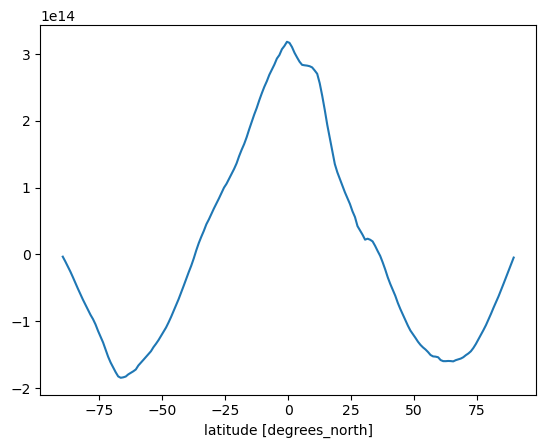

In [29]:
net_lat = TOA.toa_net_all_mon.mean(dim='time').sum(dim='lon') 
# TA 修改 
net_lat = TOA.toa_net_all_mon.mean(dim='time').sum(dim='lon')  * area*1e6
net_lat.plot()
area

## 2.4

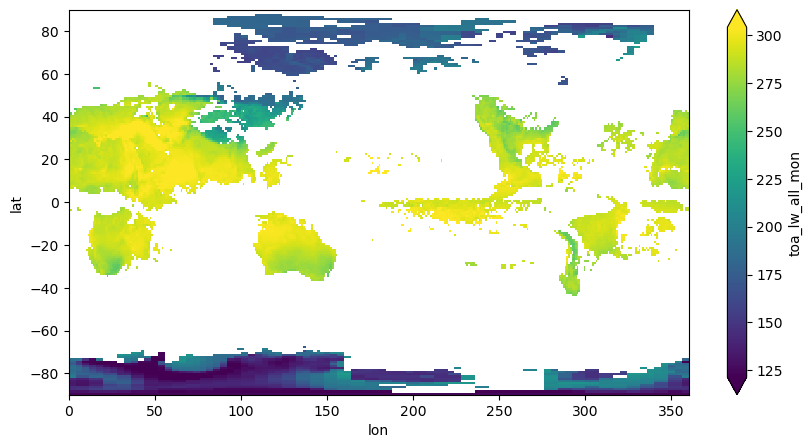

In [120]:
lw_lowCloud = TOA.where(TOA.cldarea_total_daynight_mon<=25).toa_lw_all_mon.mean(dim='time')
lw_lowCloud.plot(robust=True, figsize=(10, 5))

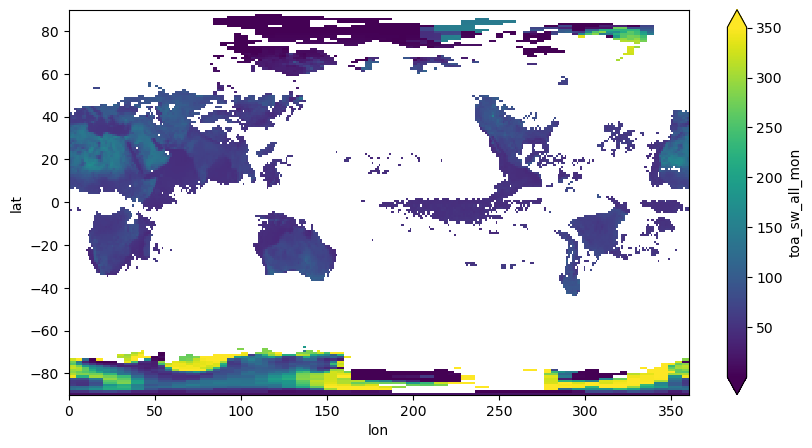

In [121]:
sw_lowCloud = TOA.where(TOA.cldarea_total_daynight_mon<=25).toa_sw_all_mon.mean(dim='time')
sw_lowCloud.plot(robust=True, figsize=(10, 5))

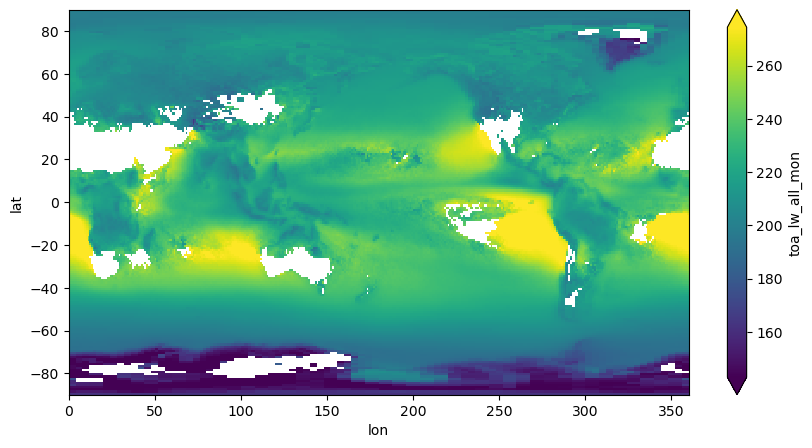

In [122]:
lw_highCloud = TOA.where(TOA.cldarea_total_daynight_mon>=75).toa_lw_all_mon.mean(dim='time')
lw_highCloud.plot(robust=True, figsize=(10, 5))

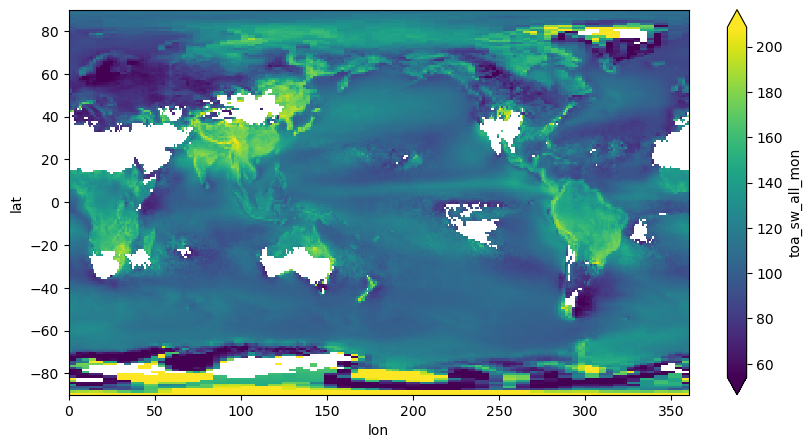

In [123]:
sw_highCloud = TOA.where(TOA.cldarea_total_daynight_mon>=75).toa_sw_all_mon.mean(dim='time')
sw_highCloud.plot(robust=True, figsize=(10, 5))

## 2.5

In [91]:
lw_lowCloud_mean = TOA.where(TOA.cldarea_total_daynight_mon<=25).toa_lw_all_mon.mean(dim=['lon', 'lat', 'time'])
lw_lowCloud_mean

<xarray.DataArray 'toa_lw_all_mon' ()>
array(247.33109, dtype=float32)

In [93]:
sw_lowCloud_mean = TOA.where(TOA.cldarea_total_daynight_mon<=25).toa_sw_all_mon.mean(dim=['lon', 'lat', 'time'])
sw_lowCloud_mean

<xarray.DataArray 'toa_sw_all_mon' ()>
array(97.11116, dtype=float32)

In [94]:
lw_highCloud_mean = TOA.where(TOA.cldarea_total_daynight_mon>=75).toa_lw_all_mon.mean(dim=['lon', 'lat', 'time'])
lw_highCloud_mean

<xarray.DataArray 'toa_lw_all_mon' ()>
array(215.39049, dtype=float32)

In [96]:
sw_highCloud_mean = TOA.where(TOA.cldarea_total_daynight_mon>=75).toa_sw_all_mon.mean(dim=['lon', 'lat', 'time'])
sw_highCloud_mean

<xarray.DataArray 'toa_sw_all_mon' ()>
array(111.76594, dtype=float32)

In [45]:
# TA 提供的代码
sw_low=TOA.toa_sw_all_mon.where(TOA.cldarea_total_daynight_mon<=25).mean(dim=['time'])
sw_high=TOA.toa_sw_all_mon.where(TOA.cldarea_total_daynight_mon>=75).mean(dim=['time'])
lw_low=TOA.toa_lw_all_mon.where(TOA.cldarea_total_daynight_mon<=25).mean(dim=['time'])
lw_high=TOA.toa_lw_all_mon.where(TOA.cldarea_total_daynight_mon>=75).mean(dim=['time'])

sw_low_=sw_low*area*1e6
sw_low_gm=sw_low_.sum()/Total_surface_area/1e6
print('sw_low_gm:',sw_low_gm.values)

lw_low_=lw_low*area*1e6
lw_low_gm=lw_low_.sum()/Total_surface_area/1e6
print('lw_low_gm:',lw_low_gm.values)

sw_high_=sw_high*area*1e6
sw_high_gm=sw_high_.sum()/Total_surface_area/1e6
print('sw_high_gm:',sw_high_gm.values)

lw_high_=lw_high*area*1e6
lw_high_gm=lw_high_.sum()/Total_surface_area/1e6
print('lw_high_gm:',lw_high_gm.values)

sw_low_gm: 19.6518862515028
lw_low_gm: 70.50560433619916
sw_high_gm: 104.54761502011318
lw_high_gm: 208.5353114726085


### 2.1 从绘制图像正确，验证了辐射平衡。
### 2.2 计算结果有误，能量不守恒。助教附上代码给您参考。
### 2.3 需要求取总量，要乘以面积，area*1e3，TA已修改代码。量级在1e14。
### 2.4 图像绘制正确。
### 2.5 平均值计算错误，需要进行面积加权，助教附上代码给您参考。
### 计算结果在报告中进行了分析。
### 得分：26/30

### =============================

# 3. Explore a netCDF dataset

In [46]:
import xarray as xr
P = xr.open_dataset("pr_Amon_CanESM5_ssp370-ssp126Lu_r1i1p2f1_gn_201501-210012.nc", engine="netcdf4")
P

<xarray.Dataset>
Dimensions:    (time: 1032, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/53)
    CCCma_model_hash:            b4233907fa44f4cf083fca1d4e041b8a6108f131
    CCCma_parent_runid:          p2-his01
    CCCma_pycmor_hash:           26c970628162d607fffd14254956ebc6dd3b6f49
    CCCma_runid:                 p2-s70l26
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   2015:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/109b8514-2781-45b7-85ab-ead6e5d...
    variable_id:                 pr
    variant_label:               r1i1p2f1
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.5.0

## 3.1

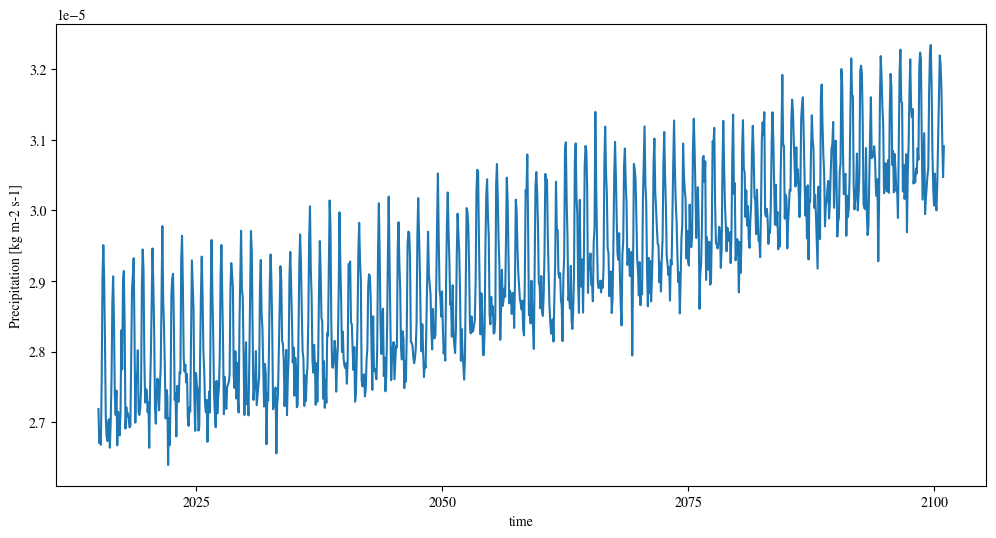

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt
P.pr.groupby('time.year').mean(dim=['lat', 'lon']).plot(figsize=(12,6))

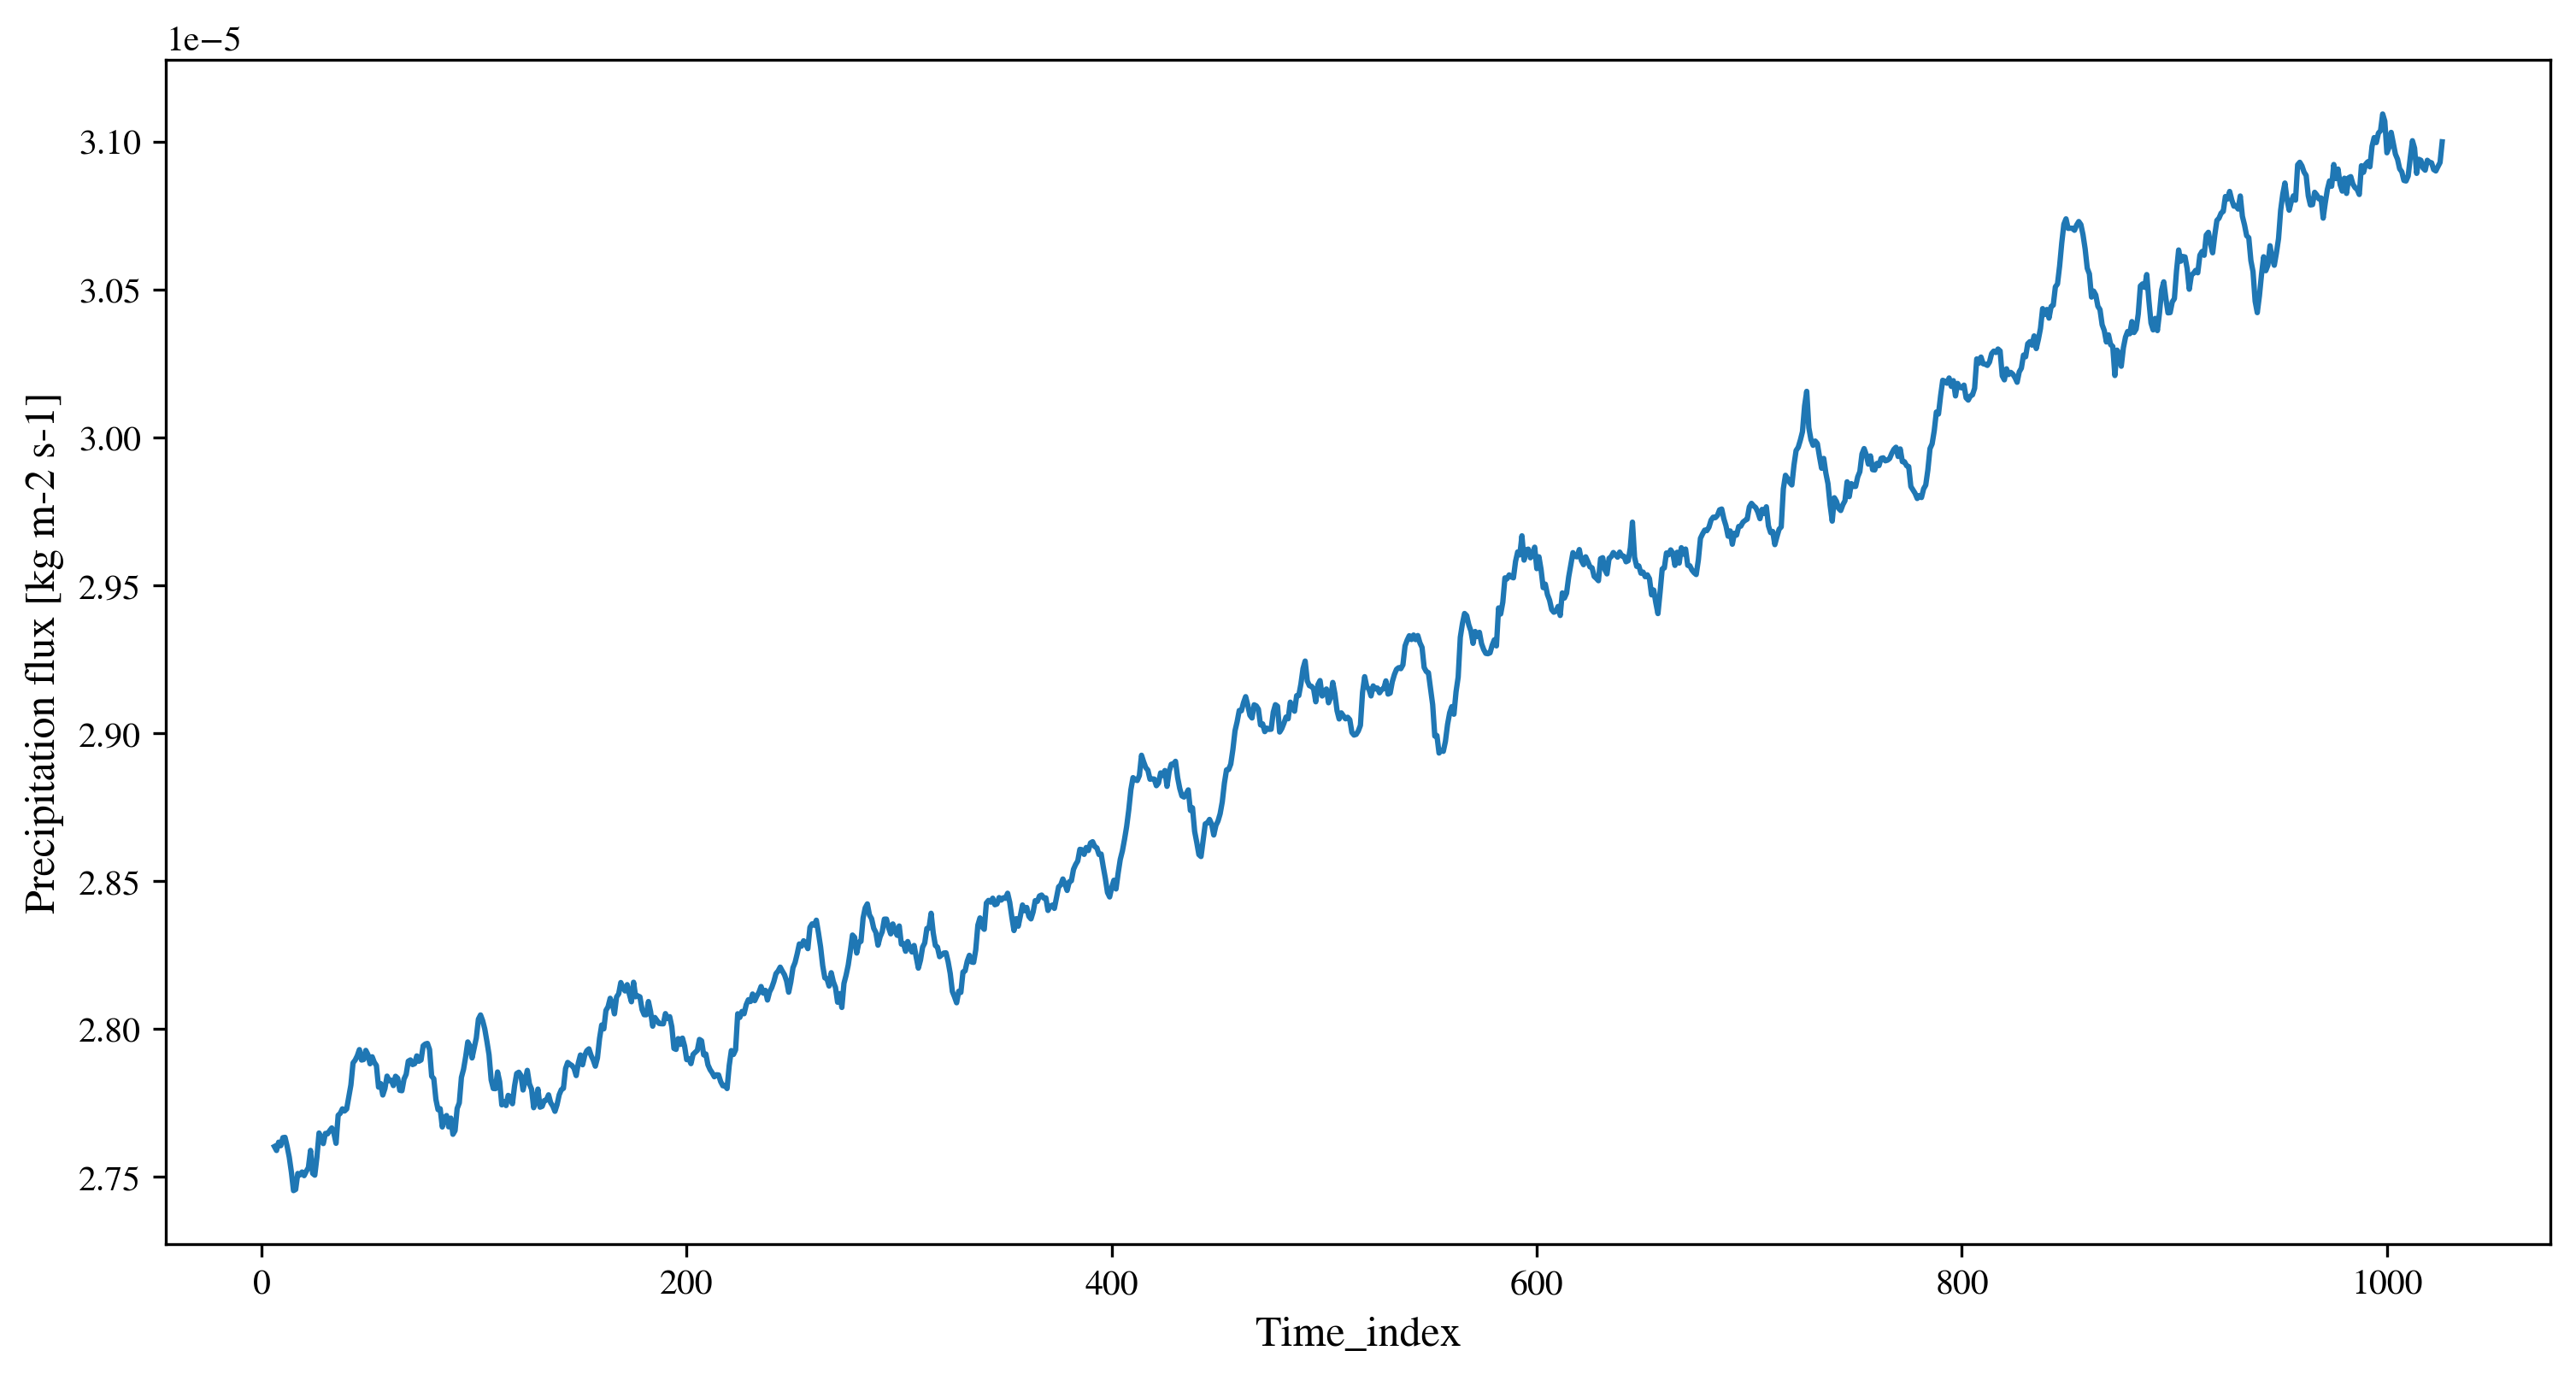

In [48]:
pr_rolling = P.pr.rolling(time=12, center=True).mean()
pr_rolling_globalmean = pr_rolling.mean(dim=['lat', 'lon'])

plt.figure(figsize=(12,6), dpi=300)
plt.plot(pr_rolling_globalmean)
plt.xlabel('Time_index', fontsize=12)
plt.ylabel('Precipitation flux [kg m-2 s-1]', fontsize=12)

plt.show()

## 3.2

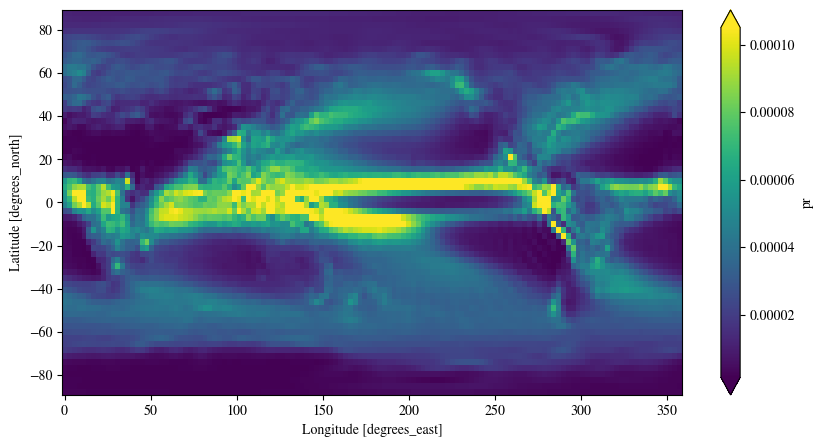

In [49]:
# global mean precipitation flux (2015-2100)
P.pr.mean(dim='time').plot(figsize=(10,5), robust=True)

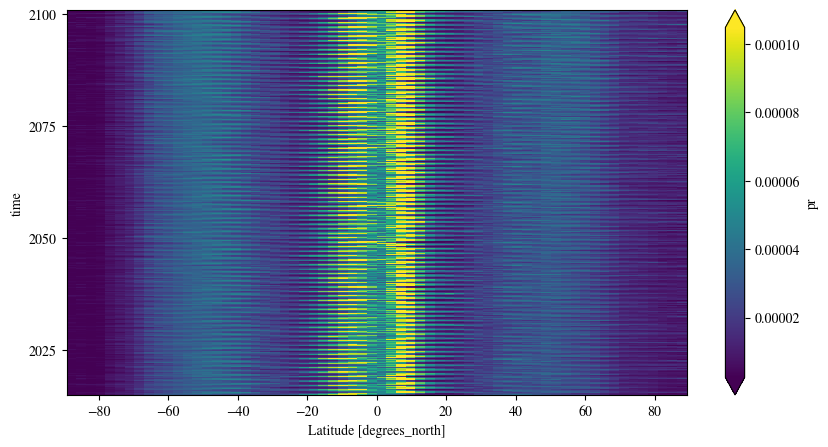

In [50]:
# future mean precipitation flux in each latitude
P.pr.mean(dim='lon').plot(figsize=(10,5), robust=True)

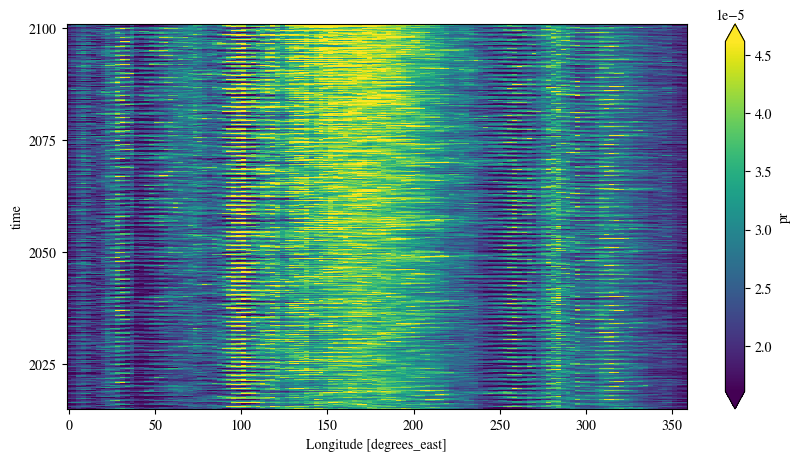

In [51]:
# future mean precipitation flux in each longitude
P.pr.mean(dim='lat').plot(figsize=(10,5), robust=True)

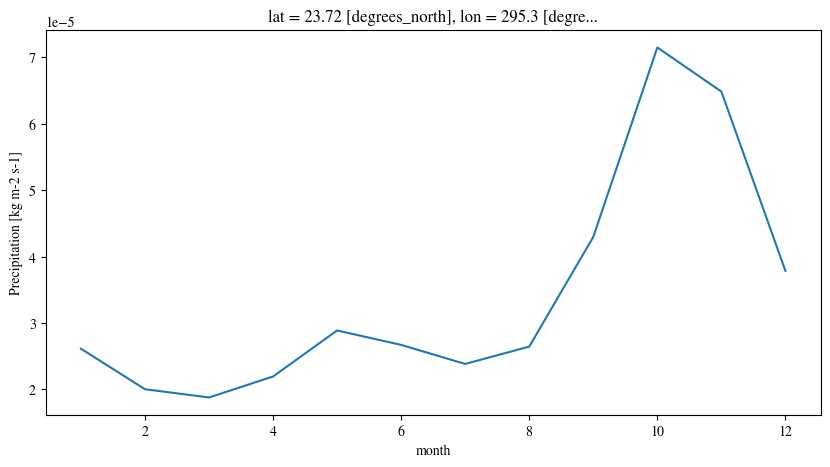

In [52]:
# future mean precipitation flux in each month in Shenzhen
P.pr.sel(lon=294.1, lat=22.5, method='nearest').groupby('time.month').mean().plot(figsize=(10,5))

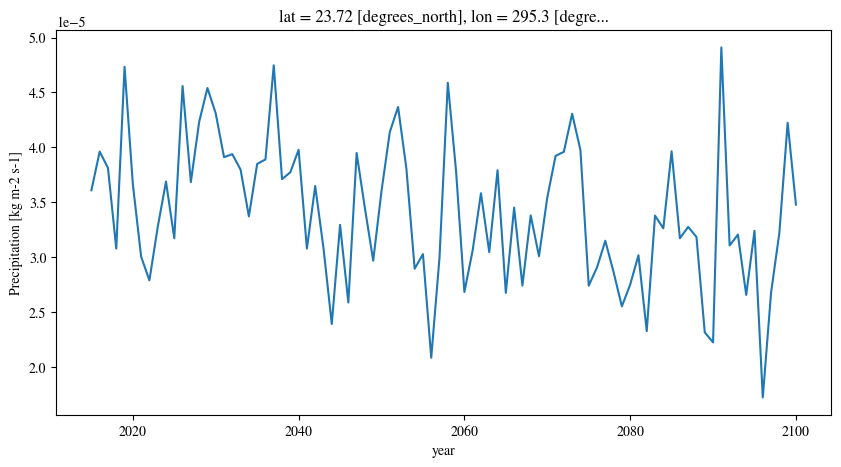

In [53]:
# future mean precipitation flux in each year in Shenzhen
P.pr.sel(lon=294.1, lat=22.5, method='nearest').groupby('time.year').mean().plot(figsize=(10,5))

### 3.1 滑动平均能够在一定程度上去除季节性信号，满足题目要求。
### 3.2 满足题目要求。
### 得分：10/10

### =============================